## Baixando séries históricas do Yahoo! Finance

**Topicos:**

* Como obter uma lista de ações
* Como baixar séries históricas de uma lista de ações
* Como salvar os DataFrames do Pandas no formato pickle<br><br>

**Considerações**

A ferramenta usada para baixar é o fix_yahoo_finance que é uma modificação feita a partir do pandas_datareader<br><br>

**1. Obtendo a lista de ações** (opcional)

O objetivo desta etapa é apenas obter uma lista de tickers.<br><br>

**2. Lista de ações da Composição Atual do IBOV**

Esta etapa obtém a lista de ações que compõem o índice Bovespa atual (2021).

Será usada uma sequência de comandos bash para extrair a lista da página Composição Atual do IBOV - Índice Bovespa, que serão executados a dentro de uma rotina Python, que posteriormente irá salvar a lista em disco.<br><br>

**3. Webscrapping: baixando a lista da página**

Poderia ser feito usando BeautifulSoup e/ou Scrapy?

Sim, no entanto para este caso utilizaremos comandos bash.<br><br>

In [1]:
import subprocess

In [2]:
# bash command line to be exectuted inside python
commands = """
# Baixando o código html da página
wget https://br.advfn.com/indice/ibovespa -O  tmp0.tmp


# Extraindo as colunas de tickers e nomes
cat tmp0.tmp | head -n434 | tail -n80 > tmp1.tmp
cat tmp1.tmp | grep 'br.advfn.com' | cut -c1-200 | cut -d. -f3- | cut -d'"' -f1,3 > tmp2.tmp
cat tmp2.tmp | cut -d'/' -f4-6 | sed -e 's./cotacao"Cotação .,.g' | cut -d',' -f1 | rev | cut -d'-' -f1 | rev  > tmp4.tmp
cat tmp2.tmp | cut -d'/' -f4-6 | sed -e 's./cotacao"Cotação .,.g' | cut -d',' -f2  > tmp5.tmp

# Salvando a lista final
paste -d, tmp4.tmp tmp5.tmp > lista_ibovespa.csv

# Removendo arquivos temporários
rm -f tmp*.tmp
"""

In [3]:
p = subprocess.Popen(commands, shell=True, stdout=subprocess.PIPE)
msg, err = p.communicate()

**Modificações adicionais**

Carregando a lista anterior como numpy.array:

In [4]:
import numpy as np
# ibovespa stock tickers
lst_stocks = np.loadtxt('./lista_ibovespa.csv', delimiter=',', dtype=str)
print('Number of stocks listed on iBovespa:', len(lst_stocks))

Number of stocks listed on iBovespa: 41


In [5]:
for ticker, name in lst_stocks[:41]:
    print('Ticker: {} | Stock name: {}'.format(ticker, name))

Ticker: IBOV/cotacao?java=1"nofollow | Stock name: IBOV/cotacao?java=1"nofollow
Ticker: ABEV3 | Stock name: Ambev SA
Ticker: ASAI3 | Stock name: Sendas Distribuidora S.A.
Ticker: AZUL4 | Stock name: AZUL SA
Ticker: B3SA3 | Stock name: B3 SA - Brasil Bolsa Balcao
Ticker: BBAS3 | Stock name: Bco Brasil Sa
Ticker: BBDC3 | Stock name: Bco Bradesco Sa
Ticker: BBDC4 | Stock name: Bco Bradesco Sa
Ticker: BBSE3 | Stock name: Bbseguridade On NM
Ticker: BEEF3 | Stock name: Minerva SA
Ticker: BPAC11 | Stock name: Banco BTG Pactual S.A.
Ticker: BRAP4 | Stock name: Bradespar Sa
Ticker: BRDT3 | Stock name: Petrobras Distribuidora Sa
Ticker: BRFS3 | Stock name: BRF Sa
Ticker: BRKM5 | Stock name: Braskem Sa
Ticker: BRML3 | Stock name: Br Malls Participacoes Sa
Ticker: BTOW3 | Stock name: B2W Companhia Digital
Ticker: CCRO3 | Stock name: CCR SA
Ticker: CIEL3 | Stock name: Cielo SA
Ticker: CMIG4 | Stock name: Cia Energetica Minas Gerais Cemig
Ticker: COGN3 | Stock name: CognaEducacao SA
Ticker: CPFE3 | 

O Yahoo! Finance emprega um sufixo para ações de bolsas fora dos EUA. Para as ações da Bovespa, por exemplo, aplica o sufixo **.SA** no símbolo de cada ação. Ou seja, a ação ABEV3 da Ambev é referenciada como 'ABEV3**.SA**'.

**Referências:**

[Exchanges and data providers on Yahoo Finance](https://help.yahoo.com/kb/SLN2310.html)

[Yahoo Finance Exchanges And Suffixes](https://sites.google.com/a/stockhistoricaldata.com/stock-historical-data/yahoo-finance-suffixes)

**Adicionando o sufixo nos simbolos:**

In [6]:
# ticker symbols with Bovespa's suffix 
lst_tickers = np.asarray([ '{}.SA'.format(x) for x in lst_stocks[:,0]], dtype=str)

# 
for ticker in lst_tickers[1:41]:
    print('Ticker: {}'.format(ticker))

Ticker: ABEV3.SA
Ticker: ASAI3.SA
Ticker: AZUL4.SA
Ticker: B3SA3.SA
Ticker: BBAS3.SA
Ticker: BBDC3.SA
Ticker: BBDC4.SA
Ticker: BBSE3.SA
Ticker: BEEF3.SA
Ticker: BPAC11.SA
Ticker: BRAP4.SA
Ticker: BRDT3.SA
Ticker: BRFS3.SA
Ticker: BRKM5.SA
Ticker: BRML3.SA
Ticker: BTOW3.SA
Ticker: CCRO3.SA
Ticker: CIEL3.SA
Ticker: CMIG4.SA
Ticker: COGN3.SA
Ticker: CPFE3.SA
Ticker: CPLE6.SA
Ticker: CRFB3.SA
Ticker: CSAN3.SA
Ticker: CSNA3.SA
Ticker: CVCB3.SA
Ticker: CYRE3.SA
Ticker: ECOR3.SA
Ticker: EGIE3.SA
Ticker: ELET3.SA
Ticker: ELET6.SA
Ticker: EMBR3.SA
Ticker: ENBR3.SA
Ticker: ENEV3.SA
Ticker: ENGI11.SA
Ticker: EQTL3.SA
Ticker: EZTC3.SA
Ticker: FLRY3.SA
Ticker: GGBR4.SA
Ticker: GNDI3.SA


**Incorporando BVMF3, Ibovespa e Dólar**<br><br>

* Até 2017 a ação B3 ON tinha o símbolo BVMF3 e em 2018 passou a usar o símbolo B3SA3. Assim a BVMF3.SA será adicionada manualmente à lista de ações a serem baixadas.

* O índice Bovespa (^BVSP) e a cotação do Dólar em reais (USDBRL=X) também serão adicionadas. (Perceba o prefixo '^' e o sufixo '=X' usados.)

In [7]:
# adding BVMF3.SA
lst_tickers = np.sort(np.concatenate((lst_tickers, ['BVMF3.SA']))) # this stock changed the name to B3SA3 in 2018

# adding ^BVSP and USDBRL=X
lst_tickers = np.concatenate((lst_tickers, ['^BVSP', 'USDBRL=X'])) # this stock changed the name to B3SA3 in 2018

# checking the last ones
for ticker in lst_tickers[-2:]:
    print('Ticker: {}'.format(ticker))

# saving the list
np.savetxt('list_tickers_yahoo.txt', lst_tickers, fmt='%s')

Ticker: ^BVSP
Ticker: USDBRL=X


## Baixando as séries históricas

O API do Yahoo! Finance não funciona mais como antes, causando falhas no uso da biblioteca pandas_datareader.<br><br>

O recente mal funcionamento com algumas APIs é descrito na página de desenvolvimento do pandas_datareader:<br><br>


**Yahoo!, Google Options, Google Quotes and EDGAR have been immediately deprecated.**

> Immediate deprecation of Yahoo!, Google Options and Quotes and EDGAR. The end points behind these APIs have radically changed and the existing readers require complete rewrites. In the case of most Yahoo! data the endpoints have been removed. PDR would like to restore these features, and pull requests are welcome.<br><br>

**Existe porém uma solução temporária para isto, o [fix-yahoo-finance](https://github.com/ranaroussi/fix-yahoo-finance).**<br><br>

O fix_yahoo_finance não está disponível na distribuição Anaconda, mas é possível o instalar a partir do pip:

`$ pip install fix_yahoo_finance --upgrade --no-cache-dir`<br><br>

**Usando o fix_yahoo_finance**

Abaixo é definida uma função que utiliza o módulo fix_yahoo_finance para baixar séries históricas do API do Yahoo! Finance.<br><br>

A função método download_stocks_from_yahoo recebe a lista de símbolos, baixa cada elemento da lista como DataFrame do Pandas e os salva no formato pickle na pasta indicada pela variável output_path. O nome do arquivo salvo para cada ação da lista é df_XXXXX.pickle onde XXXXX representa o símbolo da ação em questão, onde os prefixos e sufixos são removidos.

In [8]:
import numpy as np
import os
import subprocess
#from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

# See https://github.com/ranaroussi/fix-yahoo-finance/blob/master/README.rst
yf.pdr_override() # <== that's all it takes :-)


def download_stocks_from_yahoo(tickers, start, end, output_path='', verbose=1):
    '''
    Downloads stocks from Yahoo! Finance and saves each stock as a Pandas DataFrame object 
    in the pickle data format: df_XXXXX.pickle, where XXXXX is the ticker of a particular stock.
    
    Prefixes and suffixes are removed from the output name.    
    
    
    Inputs: 
    
        tickers: list/array of tickers
        start/end: datetime.datetime.date objects
        output_path: string
        
    Outputs:
        failed: list of the tickers whose download failed
    
    '''
    
    failed = []
    
    # creates the output folder path if it doesnt exist yet
    command = 'mkdir -p {}'.format(output_path)
    p = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE)
    msg, err = p.communicate()    
    
    
    for ticker in tickers:
        
        ticker = ticker.upper()
        
        # deleting Yahoo's prefixes and suffixes from the name
        stock_name = ticker.replace('^', '')
        stock_name = stock_name.split('=')[0]
        stock_name = stock_name.replace('.SA', '')
        
        # setting the full path for the output file
        fname_output = os.path.join(output_path,'df_{}.pickle'.format(stock_name))
       
        try:
            if verbose:
                print('\n Attempting to download {} from {} to {}.'.format(ticker, start, end))
                
            df = yf.download(ticker, start=start, end=end, as_panel=False)
               
        except:
            failed.append(ticker)
            print('* Unable to download {}. * \n'.format(ticker))
            
        else:
            try:
                df.to_pickle(fname_output)
                
            except:
                print('* Error when trying to save on disk {}. * \n'.format(fname_output))     

    return failed

**Download das ações**

Serão baixadas as séries históricas das ações do período de 01/01/2001 até a data presente. Os DataFrames serao salvos no formato pickle no diretório 'raw'.

In [9]:
import numpy as np
import datetime

# loading the list of tickers as a np.array
tickers = np.loadtxt('list_tickers_yahoo.txt', dtype=str)

# setting the start and end dates
start = datetime.datetime(2001, 1, 1).date()
end = datetime.datetime.today().date()

# setting folder name where dataframes will be saved
output_path = 'raw'

In [10]:
# downloading list of tickers
lst_failed = download_stocks_from_yahoo(tickers[:], start, end, output_path)


 Attempting to download ABEV3.SA from 2001-01-01 to 2021-04-25.
[*********************100%***********************]  1 of 1 downloaded

 Attempting to download ASAI3.SA from 2001-01-01 to 2021-04-25.
[*********************100%***********************]  1 of 1 downloaded

 Attempting to download AZUL4.SA from 2001-01-01 to 2021-04-25.
[*********************100%***********************]  1 of 1 downloaded

 Attempting to download B3SA3.SA from 2001-01-01 to 2021-04-25.
[*********************100%***********************]  1 of 1 downloaded

 Attempting to download BBAS3.SA from 2001-01-01 to 2021-04-25.
[*********************100%***********************]  1 of 1 downloaded

 Attempting to download BBDC3.SA from 2001-01-01 to 2021-04-25.
[*********************100%***********************]  1 of 1 downloaded

 Attempting to download BBDC4.SA from 2001-01-01 to 2021-04-25.
[*********************100%***********************]  1 of 1 downloaded

 Attempting to download BBSE3.SA from 2001-01-01 to 20

In [11]:
# Checking for errors

if len(lst_failed) > 0:
    print('Unable to download the following stocks:')
    print(lst_failed)
    
    #print('\n Trying one more time:')
    #lst_failed = download_stocks_from_yahoo(lst_failed, start, end, output_path)

else:
    print('All tickers downloaded successfully')

Unable to download the following stocks:
['BVMF3.SA', 'IBOV/COTACAO?JAVA=1"NOFOLLOW.SA']


**Concatenação da BVMF3 e B3SA3 (opcional)**

Como comentado anteriormente, esta ação mudou de nome em 2018. Neste passo, os DataFrames correspondentes a estas ações serão concatenados em um novo que será salvo em disco.

In [12]:
import pandas as pd
import os

picklepath = os.path.join(output_path, 'df_{}.pickle')

#df1 = pd.read_pickle( picklepath.format('BVMF3') )
df2 = pd.read_pickle( picklepath.format('B3SA3') )

#
#print(df1.shape, df2.shape)

print(df2.shape)

df2.tail()

(3334, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-16,54.480000,55.790001,54.330002,55.400002,55.400002,12728100
2021-04-19,55.419998,55.560001,54.360001,54.360001,54.360001,11616000
2021-04-20,54.099998,54.380001,53.529999,53.720001,53.720001,10378500
2021-04-22,53.950001,54.500000,53.349998,53.349998,53.349998,10763500
2021-04-23,53.700001,54.840000,53.529999,53.720001,53.720001,9376900


In [13]:
#df3 = pd.concat([df1, df2], axis=0)

#print(df1.shape, df2.shape, df3.shape)

#print(df3.columns)

print(df2.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [14]:
#df3.tail() # there are few days missing

df2.tail() # there are few days missing

# re-writing on disk
#df3.to_pickle(picklepath.format('B3SA3'))

df2.to_pickle(picklepath.format('B3SA3'))

# deleting from disk
#status = os.system('rm -f {}'.format(picklepath.format('BVMF3')))

## Carrengando os dados (Loading the data)

Os dados serão armazenados em dois dataframes:

* **df_stocks**: all the stocks
* **df_bench**: only the benchmarks

1. Importando Bibliotecas

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import dateutil
import glob
import os

2. Listando dataframes previamente armazenados

In [16]:
# listing pandas dataframes previously saved
lst_df_path = glob.glob(os.path.join('/content/raw', 'df_*.pickle'))


In [17]:
# checking the path and file names
#lst_df_path[:3]
lst_df_path[:]

['/content/raw/df_ELET3.pickle',
 '/content/raw/df_ENBR3.pickle',
 '/content/raw/df_GNDI3.pickle',
 '/content/raw/df_CSNA3.pickle',
 '/content/raw/df_EMBR3.pickle',
 '/content/raw/df_ECOR3.pickle',
 '/content/raw/df_COGN3.pickle',
 '/content/raw/df_BRKM5.pickle',
 '/content/raw/df_ENGI11.pickle',
 '/content/raw/df_BRML3.pickle',
 '/content/raw/df_USDBRL.pickle',
 '/content/raw/df_EZTC3.pickle',
 '/content/raw/df_BBDC4.pickle',
 '/content/raw/df_CVCB3.pickle',
 '/content/raw/df_CSAN3.pickle',
 '/content/raw/df_ASAI3.pickle',
 '/content/raw/df_AZUL4.pickle',
 '/content/raw/df_CRFB3.pickle',
 '/content/raw/df_BBAS3.pickle',
 '/content/raw/df_CYRE3.pickle',
 '/content/raw/df_BEEF3.pickle',
 '/content/raw/df_ABEV3.pickle',
 '/content/raw/df_BBDC3.pickle',
 '/content/raw/df_ENEV3.pickle',
 '/content/raw/df_BRDT3.pickle',
 '/content/raw/df_FLRY3.pickle',
 '/content/raw/df_EQTL3.pickle',
 '/content/raw/df_CIEL3.pickle',
 '/content/raw/df_CMIG4.pickle',
 '/content/raw/df_BBSE3.pickle',
 '/conte

In [18]:
# remove the ticker that will be used for Benchmarks later
lst_df_path.remove('/content/raw/df_BVSP.pickle')
lst_df_path.remove('/content/raw/df_USDBRL.pickle')

In [19]:
# creating a separed list for the Benchmarks
lst_df_path_bench = ['/content/raw/df_BVSP.pickle', '/content/raw/df_USDBRL.pickle']

In [20]:
lst_df_path_bench[:]

['/content/raw/df_BVSP.pickle', '/content/raw/df_USDBRL.pickle']

In [21]:
# concatenating all stocks into one dataframe
lst_df_stocks = []

for fname in lst_df_path:
    df = pd.read_pickle(fname)
    # keeping only Adj Close
    df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)
    ticker = fname.split('/content/raw/')[1].split('df_')[1].split('.')[0] 
    df.columns = [ticker]
    lst_df_stocks.append(df)
    
df_stocks = pd.concat(lst_df_stocks, axis=1)

In [22]:
df_stocks = pd.concat(lst_df_stocks, axis=1)

In [23]:
# checking column names
df_stocks.columns

Index(['ELET3', 'ENBR3', 'GNDI3', 'CSNA3', 'EMBR3', 'ECOR3', 'COGN3', 'BRKM5',
       'ENGI11', 'BRML3', 'EZTC3', 'BBDC4', 'CVCB3', 'CSAN3', 'ASAI3', 'AZUL4',
       'CRFB3', 'BBAS3', 'CYRE3', 'BEEF3', 'ABEV3', 'BBDC3', 'ENEV3', 'BRDT3',
       'FLRY3', 'EQTL3', 'CIEL3', 'CMIG4', 'BBSE3', 'BRFS3', 'CCRO3', 'CPLE6',
       'ELET6', 'CPFE3', 'BTOW3', 'B3SA3', 'BPAC11', 'GGBR4', 'BRAP4',
       'EGIE3'],
      dtype='object')

In [24]:
# concatenating the benchmarks into one dataframe
lst_df_bench = []

for fname in lst_df_path_bench:
    df = pd.read_pickle(fname)
    # keeping only Adj Close
    df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)
    ticker = fname.split('/content/raw/')[1].split('df_')[1].split('.')[0] 
    df.columns = [ticker]
    lst_df_bench.append(df)
    
df_bench = pd.concat(lst_df_bench, axis=1)

In [25]:
df_bench.columns

Index(['BVSP', 'USDBRL'], dtype='object')

In [26]:
df_bench.head()

,BVSP,USDBRL
Date,,
2001-01-02,15425.0,NaN
2001-01-03,16599.0,NaN
2001-01-04,16675.0,NaN
2001-01-05,16410.0,NaN
2001-01-08,16562.0,NaN


## Portfólio Otimizado Mensal

O objetivo é compor uma carteira com bom desempenho utilizando apenas uma pequena quantidade de ações da lista.

A cada mês será elaborada uma nova carteira com base no Índice Sharpe dos meses anteriores, e seu desempenho será comparado com três benchmarks:

* iBovespa: Índice oficial da Bovespa (composto por +60 ações)

* Média BVSP: média simples de todas as ações disponíveis da iBovespa

* Dolar: O valor atual dos dólares americanos em reais

**Restrições adicionais ao portfólio:**

O peso máximo de uma ação é de 25%
O peso mínimo de uma ação é 2%

**Resultados esperados:**

* desempenho aprimorado no longo prazo
* maior volatilidade que o iBovespa, devido ao pequeno número de ações que compõem a carteira

**Configurando a otimização**

*Baseado no curso Udemy de Jose Portilla em [Python para algoritmo financeiro e comercial.](https://www.udemy.com/python-for-finance-and-trading-algorithms/learn/v4/)*

In [27]:
from scipy.optimize import minimize

In [28]:
# utility function to obtain the expected Return, expected Volatity, and Sharpe Ration from the log returns, given the weights
def get_ret_vol_sr(weights):
    global log_ret
    weights = np.array(weights)    
    ret = np.sum( log_ret.mean() * weights * 252)
    vol = np.sqrt( np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

In [29]:
# the actual function to be minimized
def neg_sharpe(weights):
    return -1.*get_ret_vol_sr(weights)[2]

In [30]:
# contraint function
def check_sum(weights):
    return np.sum(weights) - 1.

In [31]:
# contraint function
def check_max_weight(weights):
    global max_weight
    return np.minimum(weights.max(), max_weight) - weights.max()

In [32]:
# contraint function
def check_weights(weights):
    global max_weight
    w1 = np.sum(weights) - 1.
    w2 = np.minimum(weights.max(), max_weight) - weights.max()
    return np.abs(w1) + np.abs(w2)

In [33]:
# constraint tuple
#cons = ({'type' : 'eq', 'fun' : check_sum})
#cons = ({'type' : 'eq', 'fun' : check_sum}, {'type' : 'eq', 'fun' : check_max_weight}) # did not work
cons = ({'type' : 'eq', 'fun' : check_weights}) # using this workaround instead

In [34]:
n_stocks = df_stocks.shape[1]

In [35]:
bounds = tuple([(0,1) for i in range(n_stocks)])

In [36]:
init_guess = np.ones(n_stocks) / n_stocks

## Definir parâmetros de previsão

In [37]:
# the start date of the fist prediction (year, month, day)
day_start = datetime.datetime(2020,1,1).date()

# total number of months to run the prediction
n_months_run = 16

# training months before current prediction
n_months_train = 12

# portfolio weights (before re-balancing)
max_weight = 0.25  # used in the constraint function
min_weight = 0.02  # used in the running prediction

# Previsão mensal em execução

In [38]:
delta_month = dateutil.relativedelta.relativedelta(months=+1)
delta_day = dateutil.relativedelta.relativedelta(days=+1)

valid_start = day_start
valid_end = valid_start + delta_month - delta_day

train_start = valid_start - n_months_train*delta_month
train_end = valid_start - delta_day

time = []
p = []
b1 = []
b2 = []
b3 = []


#
for i in range(n_months_run):
    
    # dataframes
    df_train = df_stocks.truncate(before=train_start, after=train_end)
    df_valid = df_stocks.truncate(before=valid_start, after=valid_end)
    df_valid_bench = df_bench.truncate(before=valid_start, after=valid_end)
    
    # calculating log returns of the training data
    log_ret = np.log( df_train.divide(df_train.shift(1, axis=0), axis=0) ).iloc[2:]
    # notice that log_ret is used by the function `get_ret_vol_sr` and, consequently,
    # the `neg_sharpe` function    
      
    
    # calculating optimized weights
    opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
    
    weights = opt_results.x
    
    
    # Weight Re-balancing
    idx = np.where(opt_results.x>=min_weight)[0]
    weights = weights[idx]
    weights /= weights.sum()
    
    labels = log_ret.columns[idx]
    
    # using the portfolio weights on the validation data
    df1 = df_valid[labels]
    df1 = df1/df1.iloc[0] # percentage return of the portfolio
    df2 = (df1 * weights).sum(axis=1)
    df2 = df2/df2.iloc[0] # percentage return of the portfolio
    
    # percentage return of the benchmarks
    df2b = df_valid_bench/df_valid_bench.iloc[0]
    
    time.append(valid_start.strftime('%Y/%m'))
    p.append(df2.iloc[-1])
    b1.append(df2b['BVSP'].iloc[-1])
    b2.append(df2b['USDBRL'].iloc[-1])
    b3.append(df1.mean(axis=1).iloc[-1]) # Simple average of all stocks
    
    print('\nStart: {}, Portfolio: {:.2f}, iBovespa: {:.2f}, Dolar: {:.2f}, Avg. : {:.2f}'.format(time[-1], p[-1],
                                                                                                 b1[-1], b2[-1], b3[-1]))
    
    for l,w in zip(labels, weights):
        print('  > {} : {:.2f}'.format(l, w))

    
    # time update for the next loop
    valid_start += delta_month
    valid_end  = valid_start + delta_month - delta_day
    
    train_start += delta_month
    train_end = valid_start - delta_day


Start: 2020/01, Portfolio: 0.98, iBovespa: nan, Dolar: 1.06, Avg. : 0.98
  > ELET3 : 0.03
  > ENBR3 : 0.03
  > GNDI3 : 0.03
  > CSNA3 : 0.03
  > EMBR3 : 0.03
  > ECOR3 : 0.03
  > COGN3 : 0.03
  > BRKM5 : 0.03
  > ENGI11 : 0.03
  > BRML3 : 0.03
  > EZTC3 : 0.03
  > BBDC4 : 0.03
  > CVCB3 : 0.03
  > CSAN3 : 0.03
  > ASAI3 : 0.03
  > AZUL4 : 0.03
  > CRFB3 : 0.03
  > BBAS3 : 0.03
  > CYRE3 : 0.03
  > BEEF3 : 0.03
  > ABEV3 : 0.03
  > BBDC3 : 0.03
  > ENEV3 : 0.03
  > BRDT3 : 0.03
  > FLRY3 : 0.03
  > EQTL3 : 0.03
  > CIEL3 : 0.03
  > CMIG4 : 0.03
  > BBSE3 : 0.03
  > BRFS3 : 0.03
  > CCRO3 : 0.03
  > CPLE6 : 0.03
  > ELET6 : 0.03
  > CPFE3 : 0.03
  > BTOW3 : 0.03
  > B3SA3 : 0.03
  > BPAC11 : 0.03
  > GGBR4 : 0.03
  > BRAP4 : 0.03
  > EGIE3 : 0.03

Start: 2020/02, Portfolio: 0.89, iBovespa: 0.91, Dolar: 1.05, Avg. : 0.89
  > ELET3 : 0.03
  > ENBR3 : 0.03
  > GNDI3 : 0.03
  > CSNA3 : 0.03
  > EMBR3 : 0.03
  > ECOR3 : 0.03
  > COGN3 : 0.03
  > BRKM5 : 0.03
  > ENGI11 : 0.03
  > BRML3 : 0.0

## Apresentando os resultados

In [39]:
d = {'Date' : pd.to_datetime(time),
    'Portfolio' : p,
    'iBovespa' : b1,
    'Dolar' : b2,
    'Avg. BVSP' : b3}
df_results = pd.DataFrame(data=d)
df_results.set_index('Date', inplace=True)

In [40]:
print('Average - Monthly returns:')
df_results.mean(axis=0)

Average - Monthly returns:


Portfolio    1.010333
iBovespa     0.980646
Dolar        1.018032
Avg. BVSP    1.011115
dtype: float64

In [41]:
print('std - Monthly returns:')
df_results.std(axis=0)

std - Monthly returns:


Portfolio    0.129255
iBovespa     0.121600
Dolar        0.055134
Avg. BVSP    0.130146
dtype: float64

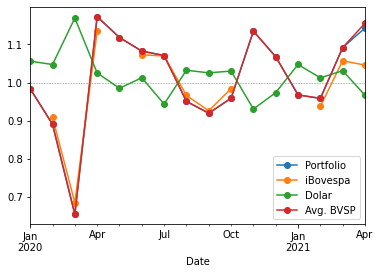

In [42]:
ax = df_results.plot(style='-o')
ax.axhline(y=1.0, color='gray', linestyle='--', lw=0.5)